Setting up a fancy stylesheet

In [1]:
from IPython.core.display import HTML
css_file = 'style.css'
HTML(open(css_file, 'r').read())

Setting up the required python &#8482; environment

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
#from scipy.stats import bayes_mvs
#from math import factorial
#import scikits.bootstrap as bs
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

%matplotlib inline
# filterwarnings('ignore')

# The Z and t distributions

## Introduction

<p>It is of utmost importance to understand the difference between the distribution of your dataset (per variable) as opposed to the two most common statistical distributions, the Z and t distributions.  Let's take white cell count (WCC) as an example.  Imagine for a moment that you could measure the WCC of 1 000 000 healthy individuals.  What would the ditribution of values look like?</p>
<p>Fist of all, let's be clear that by distribution I refer to the fact that we start counting how many times a specific WCC value comes up.  Certainly some values will come up more commonly than others.  Something deeper is going on here.  You might have guessed it.  Yes, WCC is a continuous variable.  For all practical purposes, the WCC is infinitely divisible.  If we had a very powerful WCC counting apparatus, it could measure the WCC of an individual as 5.5 or 5.56 or 5.564, or 5.5648.  Would we count the occurence of all of these as seperate values?  Not at all.  They form part of a seemless mass.  We can only make sense of ranges of values, say lump (bin) all values between 5.50 and 5.55 in a group (called a bin).  To be sure, there are many, many possible individual values between these two bounds.</p>
<p>Again, we would have to ask: Are all of these arbitrary range bins equally likely to occur?</p>
<p>Random variables come in patterns, which we call distributions.  Most variables pertaining to healthcare come in the normal form.  This means if we were to get a histogram of the variables, it would be bell-shaped, or have a normal curve.  There are many other continous distributions and also discrete distributions.  The geometric distribution is and examples of a discrete random variable distribution.</p>
<p>In the first section below I'll show you how python&#8482; (using the *scipy.stats* library can generate random variables for you to play with.  We'll use the plotting libraries of *pandas*, *matplotlib*, and *seaborn*, to image these variables.</p>

## Generating random normal variables

<p>In this first section I will create a computer variable called *rv1* and attach to it the normal distribution.  In actual fact, it will be the standard normal distribution.  The standard normal distribution has a mean of zero and a standard deviation of one.  It doesn't do much, but just to show you I'll call the *.mean()*, *.median()*, and *.std()* functions.

In [3]:
rv1 = stats.norm()
type(rv1)

scipy.stats._distn_infrastructure.rv_frozen

In [5]:
rv1.mean()

0.0

In [6]:
rv1.median()

0.0

In [7]:
rv1.std()

1.0

<p>Now that wasn't too exiting.  I can ask the *stats* library to generate a whole lot of random variables from the normal distribution.  Here I attach it to a *pandas Series* object and attach it to the computer variable name *rv1_set*.  I then use the *.describe()* function to find out a little more about my new dataset.</p>

In [13]:
rv1_values = stats.norm.rvs(size = 2000) # I create 2000 values, all taken from a normal distribution
print(type(rv1_values))
rv1_set = pd.Series(rv1_values) # Making a pandas Series object
print(type(rv1_set))
rv1_set.describe() # Every time you run this cell, a new set of variables will be created

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


count    2000.000000
mean       -0.048791
std         1.001672
min        -3.378330
25%        -0.718304
50%        -0.055560
75%         0.654389
max         3.889020
dtype: float64

<p>Now for the really interesting bit.  Graphing (plotting) the dataset.  I'll use *seaborn*'s *distplot* plot.  It will generate a histogram, which will autogenerate (unless I give it a specific value in the arguments) a bunch of bins (each describes a range of values) and then gives the number of times that a value in my dataset occurs in that range, but expressing it as a probability.  You'll clearly see that we have a bell-shaped curve.</p>
<p>The *displot* goes further and constructs what is called a kernel denisty estimate.  A mathematical equation is created to derive a smooth curve of the dataset.</p>

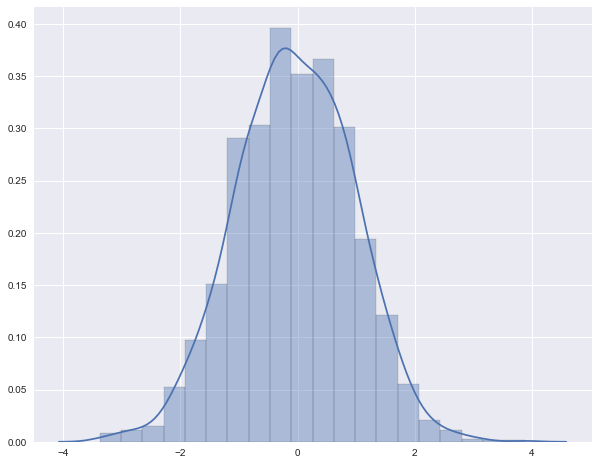

In [18]:
plt.figure(figsize = (10, 8), edgecolor='k')
sns.set()
sns.distplot(rv1_set, bins = 20, hist_kws=dict(edgecolor='k'))
plt.show();

### The probability density function

<p>The kernel density function above is a type of probability density function (see below for Z and t distributions). A probability density function stretches from negative infinity to infinity on the x-axis and includes all of the possible values in a set, with the probability of any value occuring on the y-axis.  The python&#8482; function that I use is *.cdf()*.  It calculates the area under the curve from the left up until a point on the x-axis that I want, which I add as an argument.  Say I want to ask the question: Hwo likely was it to get a value of *-2* or less from a standard normal distribution?  That would be the area under the curve from negative infinity (from the left) up until the *-2* mark.  Here we go!</p>

In [19]:
rv1.cdf(-2)

0.022750131948179195

<p>The value given is the probability of getting a value in your random dataset of less than *-2*.  Let's ask how likely it is to get a value of more than *0.7*.  Not so easy.  Remember that we calculate the area from the left, so if we plug in *0.7* as an argument, we will get the probability of getting a value of less than *0.7*.  To solve this little conundrum, remember that the total area under the curve is *1.0*.  So we can subtract the *0.7* area value from *1.0* and *voila!* we have the answer.</p>

In [20]:
1 - rv1.cdf(0.7)

0.24196365222307303

### Other normal distributions

<p>I needn't be stuck with the standard normal distribution.  I can generate and play with a set of variables from a normal distribution, with any given mean and standard deviation.</p>
<p>Here I take 200 random sample from a normal distribution with a mean of *10* and a standard deviation of *4* and construct the sample values as a *pandas Series* object that I attach to the computer variable *rv2_set*.  I'll then desribe and plot the dataset.</p>

In [27]:
rv2_set = pd.Series(stats.norm.rvs(loc = 10, scale = 4, size = 200)) # The argument loc is the eman and scale is the standard deviation

In [28]:
rv2_set.describe()

count    200.000000
mean      10.208126
std        4.181989
min       -1.244261
25%        7.150750
50%       10.500653
75%       12.924188
max       24.357283
dtype: float64

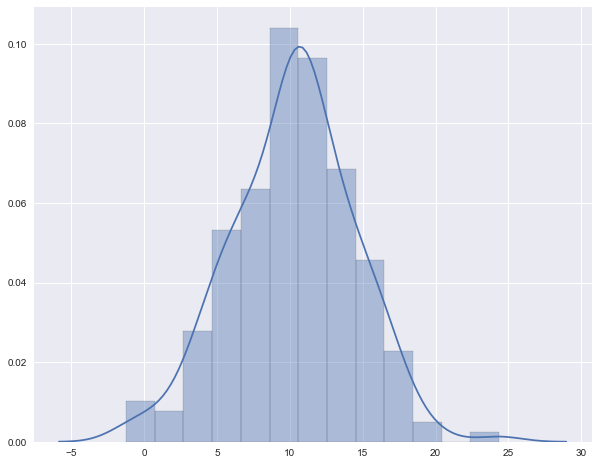

In [29]:
plt.figure(figsize = (10, 8))
sns.distplot(rv2_set, hist_kws = dict(edgecolor='k'))
plt.show();

## A completely random set of values

<p>Just to be clear, I can use the *numpy* library to generate a set of random variables, not from any know distribution.  It is never realy, really random, but that's another topic.</p>

[0.37330476 0.7198505  0.53782008 ... 0.53342784 0.6233242  0.0573656 ]


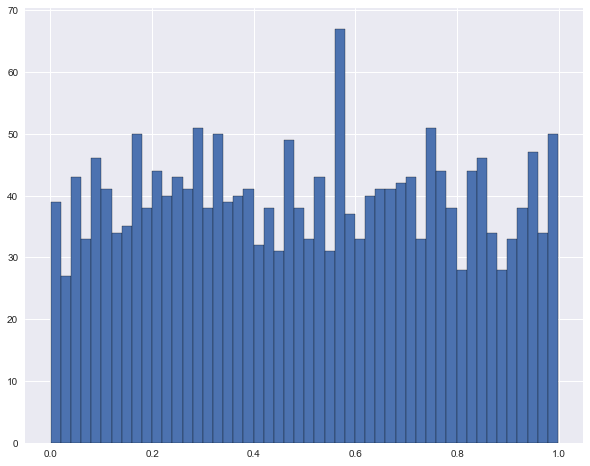

In [31]:
random_variables = np.random.random(size = 2000)
print(random_variables)
plt.figure(figsize = (10, 8))
plt.hist(random_variables, bins = 50, edgecolor='k' )
plt.show();

## The Z distribution

<p>From the lecture on the central limit theorem (CLT) you'll remember that we talked about the mean of all the possible means (remember combination?).  When we plot a histogram of this, we note that it is bell-shaped, or normal.  It also has a probability density function and we can ask the same questions of it.  What is the probability (area under the curve) for getting a value larger than such or such?</p>
<p>Now, when we talk about the Z distribution, we are no longer talking about the data from you actual sample set.  It is a distribution of all the possible means.  We use the equation for the Z distribution when we know (or can accurately estimate) population standard deviation and mean.  This happends very rarely.</p>

<p>The equation for the probability desnity function of the Z distribuition (normal distribution) is:</p>
$$ \frac { 1 }{ \sigma \sqrt { 2\pi  }  } { e }^{ -{ \frac { { \left( x-\mu  \right)  }^{ 2 } }{ { 2\sigma  }^{ 2 } }  } } $$
<p>Below is a bit of code to construct a plot from this equation.  You'll note that it is indeed bell-shaped.</p>

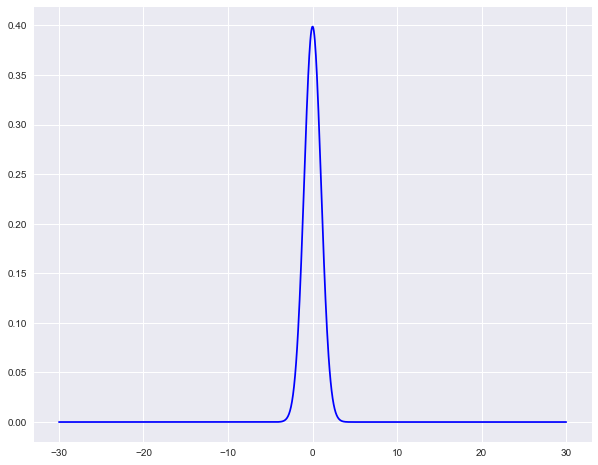

In [32]:
x = np.linspace(-30, 30, 1000)
sigma = 1
mu =0
pdf_z = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu) ** 2 / (2 * sigma ** 2)))

plt.figure(figsize = (10,8))
plt.plot(x, pdf_z, 'b-')
plt.show();

## The t distribution

<p>It is much more common for us to know **nothing** about the population standard deviation.  In this case we have to construct a bell-shaped curve from the data we have at our disposal (our sample data).  The mathematics of this is quite spectacular as you'll see in the equation below.  In essence it construct for us a histogram of all the possible means.</p>
<p>It is from this distribution that we calculate probability (area under the curve) for any question we would like answered.  For instance, consider that we have a set of values for a variable for each of two groups.  We calculate the means of each group and want to know if the difference in means is significant.  We could to a t-test for this.  When we do this t-test using the equation below, we (well actually python&#8482;) will calculate a t-distribution for the difference between the means of the two groups that we have in our study.  From this bell-shaped distribution (as guarenteed from the CLT) we can now ask: What was the probability (*p*-value or area under the curve) for finding our specific difference in means?</p>

<p>The equation for the probability density function of the t-distribution is:</p>
$$ \frac { \Gamma \left( \frac { \nu +1 }{ 2 }  \right)  }{ \sqrt { \nu \pi  } \Gamma \left( \frac { \nu  }{ 2 }  \right)  } { \left( 1+\frac { { t }^{ 2 } }{ \nu  }  \right)  }^{ -\frac { \nu +1 }{ 2 }  } $$
<p>...where:</p>
$$ \Gamma $$
<p>...is the gamma function and</p>
$$ \nu $$
<p>...is the degrees of freedom.  I told you it was spectacular!</p>
<p>In the example below I will generate *1000* examples from a t distribution and show you what the plot looks like.</p>

In [16]:
df = 10 # the distribution will loook different for each value given as the degrees of freedom
r = stats.t.rvs(df, size = 1000) # Generating 1000 values and attaching it to the computer variable r

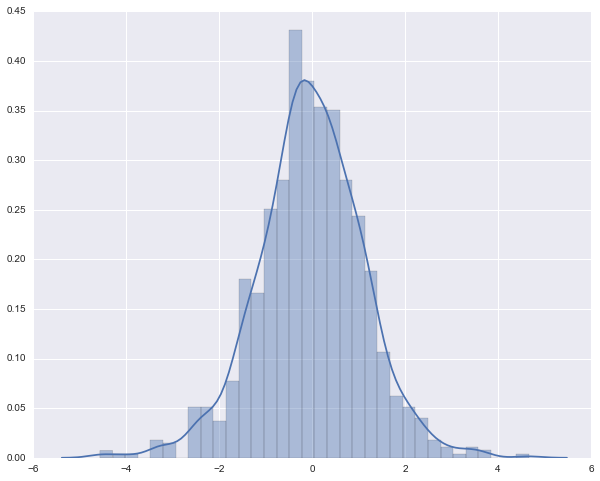

In [17]:
plt.figure(figsize = (10,8))
sns.distplot(r)
plt.show();

<p>PLEASE note that I only include this last example to illustrate the bell-shaped nature of the curve.  A plot of the t-distribution is not a plot of your actual variable values.  It uses your data (or the difference between you means (and other parameters) to construct a plot (probability density function) of the means of all possible means you could have gotten had you been able to do your study over and over and over again!  Combinations rule!</p>